# Preprocesado de los datos


## Introducción al dataset


El Dataset ha sido extraído de kaggle, tenemos datos sobre fríjoles secos, y la variredad a la que pertenecen.</br>
Contamos con la siguientes columnas:</br></br>


1.) Area : El área de una zona de frijoles y el número de píxeles dentro de sus límites.

2.) Perimeter : La circunferencia del frijol se define como la longitud de su borde.

3.) Major axis length : La distancia entre los extremos de la línea más larga que se puede dibujar desde un frijol.

4.) Minor axis length : La línea más larga que se puede dibujar desde el frijol mientras está perpendicular al eje principal.

5.) Aspect ratio : Define la relación entre Major axis length y Minor axis length.

6.) Eccentricity : Excentricidad de la elipse que tiene los mismos momentos que la región.

7.) Convex area : Número de píxeles en el polígono convexo más pequeño que puede contener el área de una semilla de frijol.

8.) Equivalent diameter : El diámetro de un círculo que tiene la misma área que el área de una semilla de frijol.

9.) Extent : La relación de los píxeles en el cuadro delimitador al área del frijol.

10.) Solidity : También conocida como convexidad. La relación de los píxeles en la cáscara convexa a los encontrados en los frijoles.

11.) Roundness : Calculada con la siguiente fórmula: (4piA)/(P^2)

12.) Compactness : Mide la redondez de un objeto: Ed/L

13.) ShapeFactor1

14.) ShapeFactor2

15.) ShapeFactor3

16.) ShapeFactor4

17.) Class: Clase (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)




## Importamos el dataset

In [2]:
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [4]:
df_entero=pd.read_excel('Dry_Bean_Dataset.xlsx')
df_entero

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


## Manejo de datos missing


In [5]:
df_entero.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

Como podemos observar, de forma natural no hay valores missings en nuestro dataset.

## Manejo de datos categóricos

In [6]:
for column in df_entero.columns:
    num_distinct_values = len(df_entero[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

Area: 12011 distinct values
Perimeter: 13416 distinct values
MajorAxisLength: 13543 distinct values
MinorAxisLength: 13543 distinct values
AspectRation: 13543 distinct values
Eccentricity: 13543 distinct values
ConvexArea: 12066 distinct values
EquivDiameter: 12011 distinct values
Extent: 13535 distinct values
Solidity: 13526 distinct values
roundness: 13543 distinct values
Compactness: 13543 distinct values
ShapeFactor1: 13543 distinct values
ShapeFactor2: 13543 distinct values
ShapeFactor3: 13543 distinct values
ShapeFactor4: 13543 distinct values
Class: 7 distinct values


Como podemos observar, la única variable categórica que encontramos en nuestro dataset es Class, y al ser esta nuestra variable objetivo, no tenemos que realizar ningún tipo de procesamiento de variables categóricas.

# EDA Básico

Antes de continuar, tenemos que hacer una copia de nuestro dataframe, pero sin la variable class, la cual nos indica la clase del fríjol, para poder continuar con los demás puntos del trabajo

In [7]:
df = df_entero.drop('Class', axis=1)

Antes de empezar con la normalización de los datos, vamos a comprobar que no tengamos valores menores que 0 en ninguna de nuestras columnas, ya que eso podría supones una problema a la hora de utilizar el método del logaritmo


In [8]:
(df.values < 0).any()

False

<Axes: >

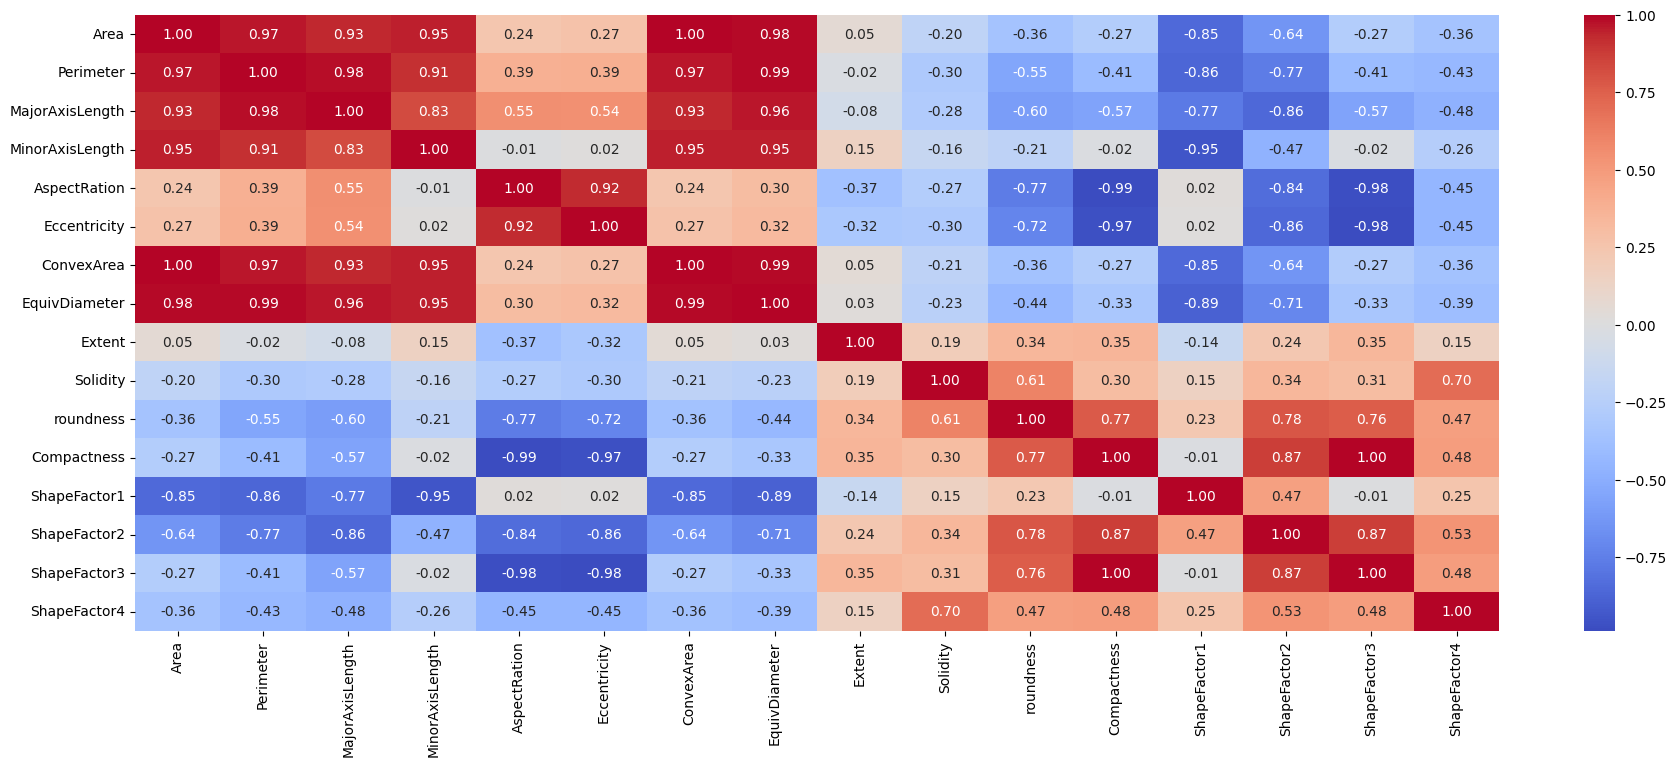

In [9]:
fig, ax = plt.subplots(figsize = (22, 8))

sns.heatmap(df.corr(), annot=True, fmt = '.2f', cmap="coolwarm")

Como podemos observar, muchas de nuestras variables tienen índices de correlación muy altos, esto se debe a que varias de nuestras variables, describen propiedades parecidas del fríjol, como la altura y la anchura, el perímetro y el diámetro...

Así que vamos a prescindir de las variables que tengan un índice de correlación mayor a 0.9

In [10]:
df.drop(['Area', 'Perimeter', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Compactness', 'ShapeFactor1', 'ShapeFactor3'], axis=1, inplace=True)

In [11]:
df

,MajorAxisLength,MinorAxisLength,AspectRation,Extent,Solidity,roundness,ShapeFactor2,ShapeFactor4
0,208.178117,173.888747,1.197191,0.763923,0.988856,0.958027,0.003147,0.998724
1,200.524796,182.734419,1.097356,0.783968,0.984986,0.887034,0.003564,0.998430
2,212.826130,175.931143,1.209713,0.778113,0.989559,0.947849,0.003048,0.999066
3,210.557999,182.516516,1.153638,0.782681,0.976696,0.903936,0.003215,0.994199
4,201.847882,190.279279,1.060798,0.773098,0.990893,0.984877,0.003665,0.999166
...,...,...,...,...,...,...,...,...
13606,288.721612,185.944705,1.552728,0.714574,0.990331,0.916603,0.001749,0.998385
13607,281.576392,190.713136,1.476439,0.799943,0.990752,0.922015,0.001886,0.998219
13608,281.539928,191.187979,1.472582,0.729932,0.989899,0.918424,0.001888,0.996767
13609,283.382636,190.275731,1.489326,0.705389,0.987813,0.907906,0.001852,0.995222


# Estandarización y normalización

### Estandarización


Vamos a representar todas nuestras variables antes de aplicar el método del algoritmo

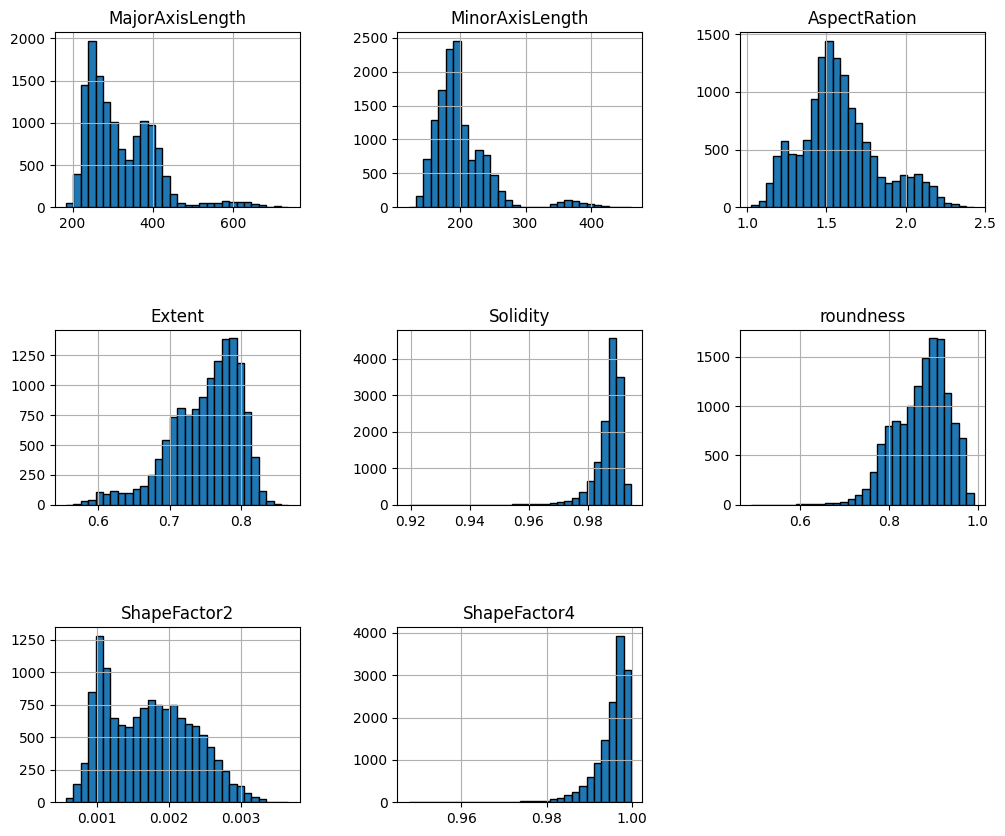

In [12]:
df.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

Y a mostrar la medida de skewness y kurtosis de todas nuestras variables

In [13]:
cols = df.columns
for c in cols:
    print(f"------{c}------")
    print("Skewness: %f" % df[c].skew())
    print("Kurtosis: %f" % df[c].kurt())

------MajorAxisLength------
Skewness: 1.357815
Kurtosis: 2.531902
------MinorAxisLength------
Skewness: 2.238211
Kurtosis: 6.651067
------AspectRation------
Skewness: 0.582573
Kurtosis: 0.113814
------Extent------
Skewness: -0.895348
Kurtosis: 0.643319
------Solidity------
Skewness: -2.550093
Kurtosis: 12.799621
------roundness------
Skewness: -0.635749
Kurtosis: 0.374306
------ShapeFactor2------
Skewness: 0.301226
Kurtosis: -0.859254
------ShapeFactor4------
Skewness: -2.759483
Kurtosis: 13.038067


<ipython-input-69-dfa8c6695b17>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MajorAxisLength'], hist = True, kde = True)


1.357815283538504
2.5319020623385935


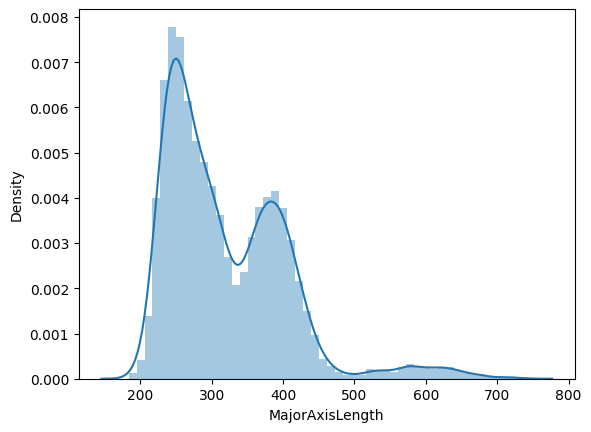

In [ ]:
sns.distplot(df['MajorAxisLength'], hist = True, kde = True)
print(df['MajorAxisLength'].skew())
print(df['MajorAxisLength'].kurt())

<ipython-input-42-d005ae392969>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MajorAxisLength'], hist = True, kde = True)


0.6294854107421357
0.025341464083931786


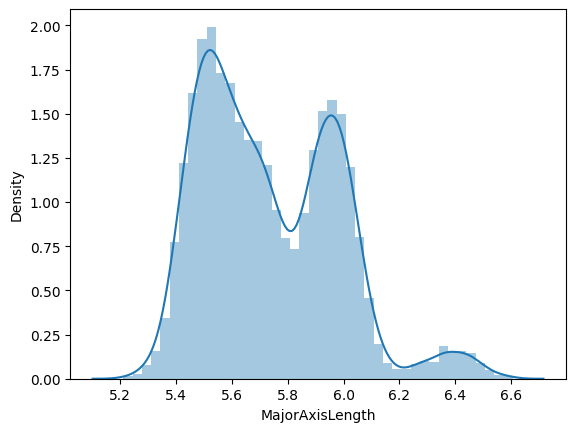

In [ ]:
df['MajorAxisLength'] = np.log(df['MajorAxisLength'])
sns.distplot(df['MajorAxisLength'], hist = True, kde = True)
print(df['MajorAxisLength'].skew())
print(df['MajorAxisLength'].kurt())

<ipython-input-43-ef334b986667>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MinorAxisLength'], hist = True, kde = True)


2.2382105396094616
6.6510668036491225


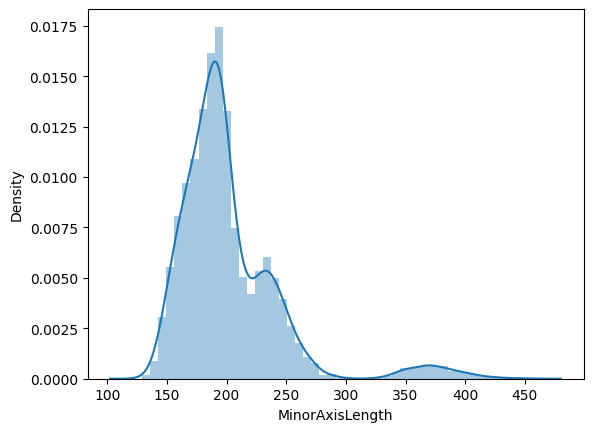

In [ ]:
sns.distplot(df['MinorAxisLength'], hist = True, kde = True)
print(df['MinorAxisLength'].skew())
print(df['MinorAxisLength'].kurt())

<ipython-input-44-28dcdeb336cc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MinorAxisLength'], hist = True, kde = True)


1.308713313303543
2.70779377005616


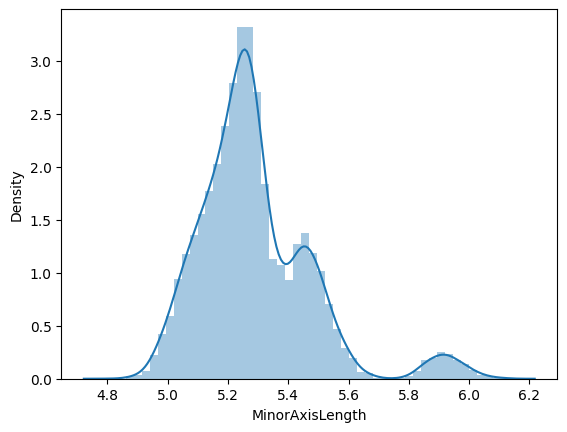

In [ ]:
df['MinorAxisLength'] = np.log(df['MinorAxisLength'])
sns.distplot(df['MinorAxisLength'], hist = True, kde = True)
print(df['MinorAxisLength'].skew())
print(df['MinorAxisLength'].kurt())

<ipython-input-45-a957db8ed0ca>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['AspectRation'], hist = True, kde = True)


0.582573399224162
0.11381444057675294


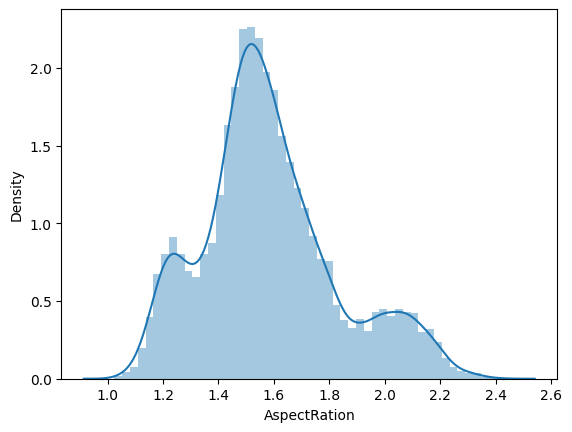

In [ ]:
sns.distplot(df['AspectRation'], hist = True, kde = True)
print(df['AspectRation'].skew())
print(df['AspectRation'].kurt())

<ipython-input-46-d37370011b4a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['AspectRation'], hist = True, kde = True)


0.17505058071771837
-0.17670638710785846


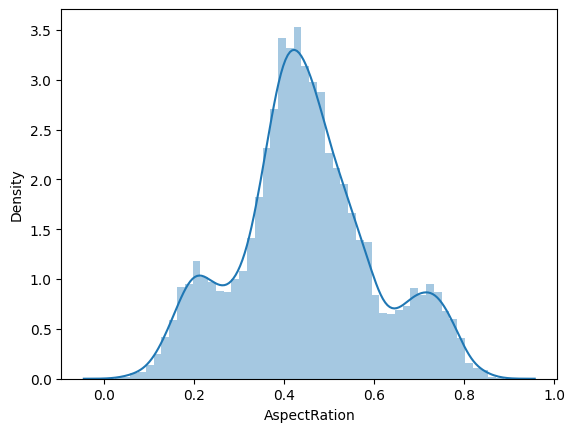

In [ ]:
df['AspectRation'] = np.log(df['AspectRation'])
sns.distplot(df['AspectRation'], hist = True, kde = True)
print(df['AspectRation'].skew())
print(df['AspectRation'].kurt())

<ipython-input-47-ccf06652162b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Extent'], hist = True, kde = True)


-0.8953484282439236
0.6433188439711897


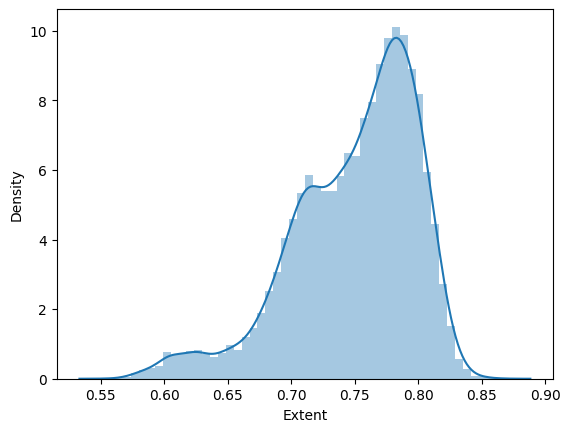

In [ ]:
sns.distplot(df['Extent'], hist = True, kde = True)
print(df['Extent'].skew())
print(df['Extent'].kurt())

<ipython-input-48-9cdfbfbd7596>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Extent'], hist = True, kde = True)


-1.0942297595310313
1.2426118314433543


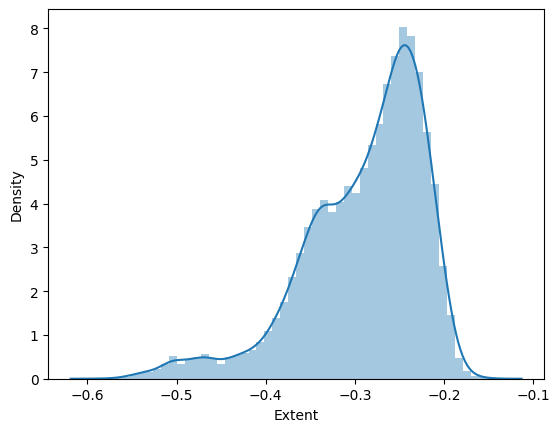

In [ ]:
df['Extent'] = np.log(df['Extent'])
sns.distplot(df['Extent'], hist = True, kde = True)
print(df['Extent'].skew())
print(df['Extent'].kurt())

<ipython-input-49-f2e78a668023>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Solidity'], hist = True, kde = True)


-2.5500931076087867
12.799620974894447


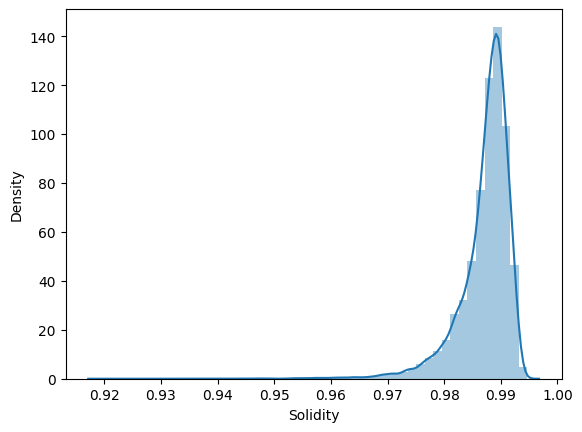

In [ ]:
sns.distplot(df['Solidity'], hist = True, kde = True)
print(df['Solidity'].skew())
print(df['Solidity'].kurt())

<ipython-input-50-0f45235d0239>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Solidity'], hist = True, kde = True)


-2.6110981484942353
13.58196666717276


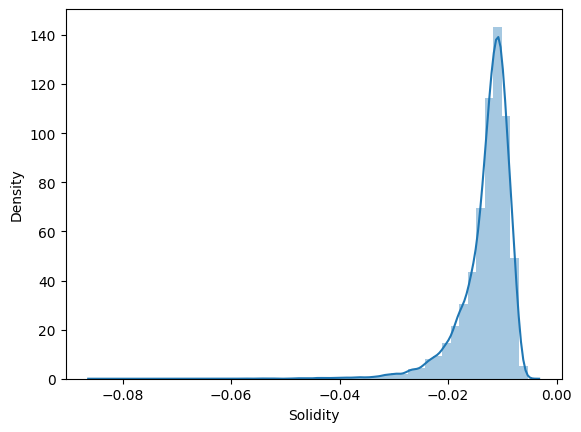

In [ ]:
df['Solidity'] = np.log(df['Solidity'])
sns.distplot(df['Solidity'], hist = True, kde = True)
print(df['Solidity'].skew())
print(df['Solidity'].kurt())

<ipython-input-51-4ab78d34de8d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['roundness'], hist = True, kde = True)


-0.6357489499307082
0.37430633319783535


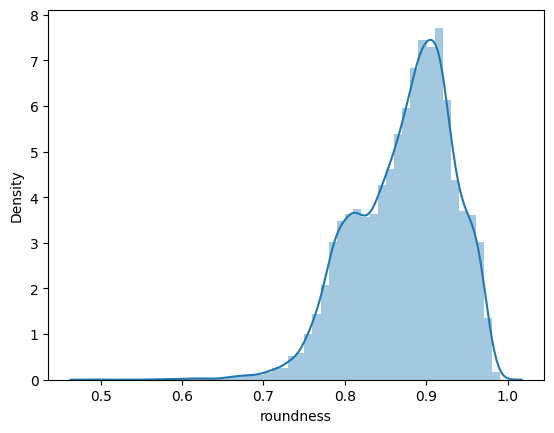

In [ ]:
sns.distplot(df['roundness'], hist = True, kde = True)
print(df['roundness'].skew())
print(df['roundness'].kurt())

<ipython-input-52-102ba79d2956>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['roundness'], hist = True, kde = True)


-0.8768452912788743
1.3636132246791002


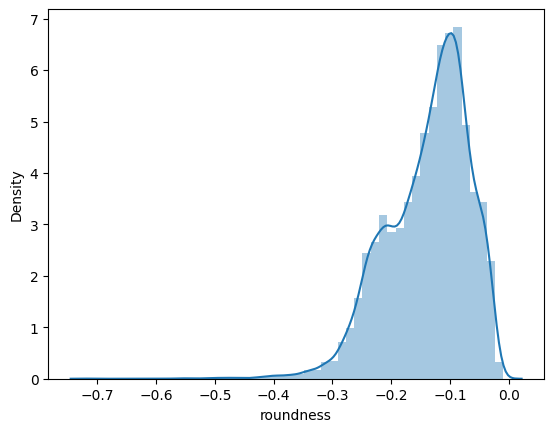

In [ ]:
df['roundness'] = np.log(df['roundness'])
sns.distplot(df['roundness'], hist = True, kde = True)
print(df['roundness'].skew())
print(df['roundness'].kurt())

<ipython-input-53-0ffe525d40fa>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ShapeFactor2'], hist = True, kde = True)


0.30122592966591644
-0.8592542148440145


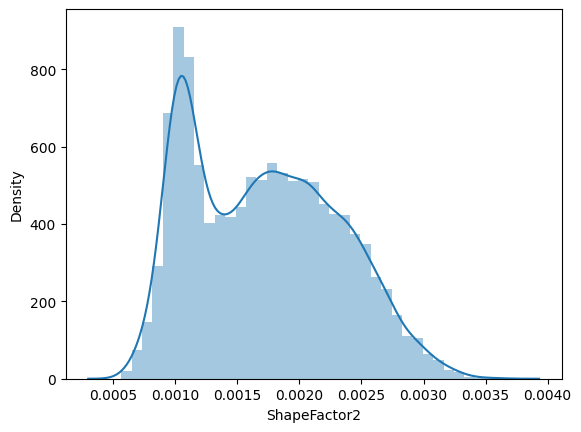

In [ ]:
sns.distplot(df['ShapeFactor2'], hist = True, kde = True)
print(df['ShapeFactor2'].skew())
print(df['ShapeFactor2'].kurt())

<ipython-input-54-a5d2dd6ba7b3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ShapeFactor2'], hist = True, kde = True)


-0.2182690259682371
-0.9907906002052655


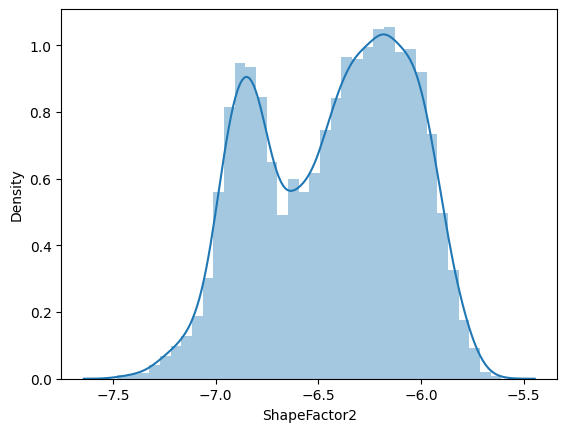

In [ ]:
df['ShapeFactor2'] = np.log(df['ShapeFactor2'])
sns.distplot(df['ShapeFactor2'], hist = True, kde = True)
print(df['ShapeFactor2'].skew())
print(df['ShapeFactor2'].kurt())

<ipython-input-55-f5c9025586ae>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ShapeFactor4'], hist = True, kde = True)


-2.7594829116803807
13.038067127932232


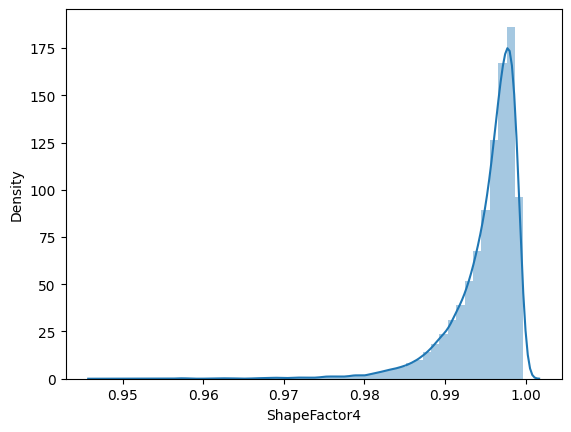

In [ ]:
sns.distplot(df['ShapeFactor4'], hist = True, kde = True)
print(df['ShapeFactor4'].skew())
print(df['ShapeFactor4'].kurt())

<ipython-input-56-7a57361c59ec>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ShapeFactor4'], hist = True, kde = True)


-2.809662961204787
13.588332638028442


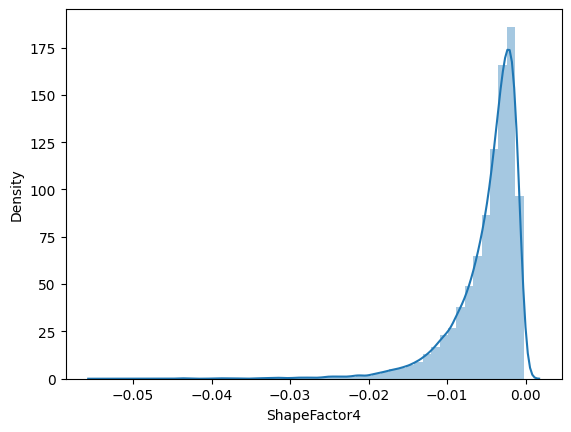

In [ ]:
df['ShapeFactor4'] = np.log(df['ShapeFactor4'])
sns.distplot(df['ShapeFactor4'], hist = True, kde = True)
print(df['ShapeFactor4'].skew())
print(df['ShapeFactor4'].kurt())

Vamos a aplicar el método del logaritmos a las variables que mejoran tanto en skewness como en kurtosis.

In [14]:
df['MajorAxisLength'] = np.log(df['MajorAxisLength'])
df['MinorAxisLength'] = np.log(df['MinorAxisLength'])
df['AspectRation'] = np.log(df['AspectRation'])

In [15]:
df

,MajorAxisLength,MinorAxisLength,AspectRation,Extent,Solidity,roundness,ShapeFactor2,ShapeFactor4
0,5.338394,5.158416,0.179978,0.763923,0.988856,0.958027,0.003147,0.998724
1,5.300938,5.208034,0.092904,0.783968,0.984986,0.887034,0.003564,0.998430
2,5.360476,5.170093,0.190383,0.778113,0.989559,0.947849,0.003048,0.999066
3,5.349761,5.206841,0.142920,0.782681,0.976696,0.903936,0.003215,0.994199
4,5.307514,5.248493,0.059021,0.773098,0.990893,0.984877,0.003665,0.999166
...,...,...,...,...,...,...,...,...
13606,5.665463,5.225449,0.440014,0.714574,0.990331,0.916603,0.001749,0.998385
13607,5.640404,5.250770,0.389633,0.799943,0.990752,0.922015,0.001886,0.998219
13608,5.640274,5.253257,0.387017,0.729932,0.989899,0.918424,0.001888,0.996767
13609,5.646798,5.248474,0.398324,0.705389,0.987813,0.907906,0.001852,0.995222


### Normalización


La normalización de los datos la vamos a aplicar justo antes de pasarlos al algoritmo, para así poder controlar mejor qué datos están normalizados y cuales no, y poder desnormalizarlos de forma correcta a la hora de interpretar nuestras predicciones.

In [16]:
from sklearn.preprocessing import StandardScaler
scaler_simple = StandardScaler()
X_scaled = scaler_simple.fit_transform(df)

# Aplicación de Algoritmos


## K-Means


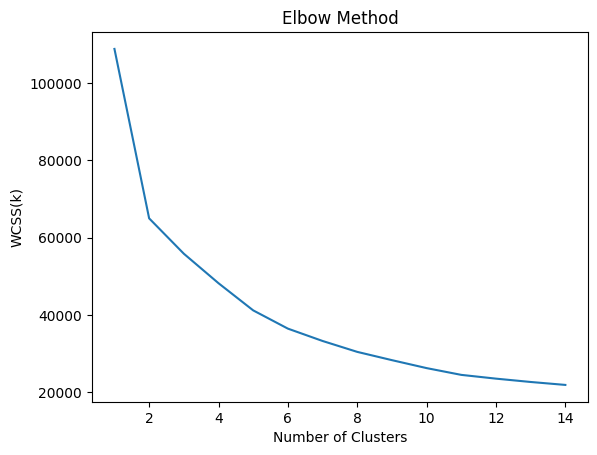

In [ ]:
# Create a KMeans object
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = "k-means++", n_init = 10, max_iter = 1000, random_state = 0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,15), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS(k)")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 7, init="k-means++", n_init = 10, max_iter = 1000, random_state = 0)
y_kmeans = kmeans.fit_predict(X_scaled)
print(y_kmeans)
print(type(y_kmeans))
print(y_kmeans.shape)


[0 0 0 ... 6 6 6]
<class 'numpy.ndarray'>
(13611,)


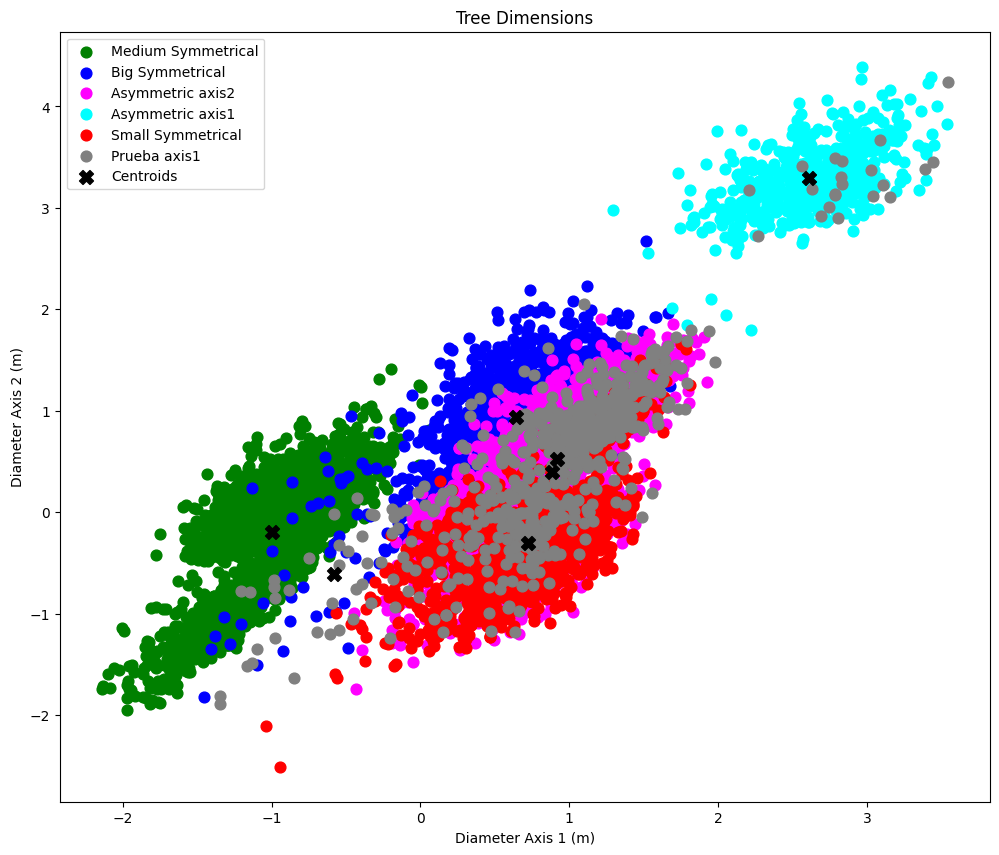

In [ ]:
# Plotting the training data results
plt.figure(figsize=(12,10))
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s = 60, c = "green", label = "Medium Symmetrical")
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s = 60, c = "blue", label = "Big Symmetrical")
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s = 60, c = "magenta", label = "Asymmetric axis2")
plt.scatter(X_scaled[y_kmeans == 3, 0], X_scaled[y_kmeans == 3, 1], s = 60, c = "cyan", label = "Asymmetric axis1")
plt.scatter(X_scaled[y_kmeans == 4, 0], X_scaled[y_kmeans == 4, 1], s = 60, c = "red", label = "Small Symmetrical")
plt.scatter(X_scaled[y_kmeans == 5, 0], X_scaled[y_kmeans == 5, 1], s = 60, c = "grey", label = "Prueba axis1")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100, marker='X', c = "black", label = "Centroids") # "cluster_centers_" este atributo nos da la posición del centro de los clusters.
plt.title("Tree Dimensions")
plt.xlabel("Diameter Axis 1 (m)")
plt.ylabel("Diameter Axis 2 (m)")
plt.legend()
plt.show()

In [ ]:
print ( "Number of trees included in the green cluster = %i" %len(X_scaled[y_kmeans == 0, 0]))
print ( "Number of trees included in the blue cluster = %i" %len(X_scaled[y_kmeans == 1, 0]))
print ( "Number of trees included in the magenta cluster = %i" %len(X_scaled[y_kmeans == 2, 0]))
print ( "Number of trees included in the cyan cluster = %i" %len(X_scaled[y_kmeans == 3, 0]))


Number of trees included in the green cluster = 2665
Number of trees included in the blue cluster = 1224
Number of trees included in the magenta cluster = 2187
Number of trees included in the cyan cluster = 506


## DBScan


In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
# Identificar Clusters
clusters = DBSCAN(eps=2, min_samples=10).fit_predict(X_scaled)
print(clusters)

[0 0 0 ... 0 0 0]


In [ ]:
set(clusters)

{-1, 0}

La función set, extrae de una lista todos sus valores únicos, como podemos ver, en este caso, el algoritmo DBSCAN nos está indicando que deberíamos tener tan solo 2 clusters.

## Propagación de afinidad


In [17]:
keys = set(df.keys())

s = pd.DataFrame(0, columns=df.columns, index=df.columns)

for i in keys:
    for k in keys:
        s.loc[i, k] = -((df[i] - df[k])**2).sum()

s

,MajorAxisLength,MinorAxisLength,AspectRation,Extent,Solidity,roundness,ShapeFactor2,ShapeFactor4
MajorAxisLength,-0.000000,-3046.534364,-381324.226745,-339457.200458,-307931.621799,-323131.663556,-448563.949059,-306913.282615
MinorAxisLength,-3046.534364,-0.000000,-319913.257410,-281015.775083,-252451.614051,-266079.194632,-381078.689760,-251526.904106
AspectRation,-381324.226745,-319913.257410,0.000000,-1667.447507,-4286.052120,-3023.216810,-3027.800508,-4406.079483
Extent,-339457.200458,-281015.775083,-1667.447507,-0.000000,-799.060823,-261.381447,-7648.360131,-851.392165
Solidity,-307931.621799,-252451.614051,-4286.052120,-799.060823,-0.000000,-220.383871,-13217.456070,-1.020020
roundness,-323131.663556,-266079.194632,-3023.216810,-261.381447,-220.383871,-0.000000,-10386.748439,-246.995465
ShapeFactor2,-448563.949059,-381078.689760,-3027.800508,-7648.360131,-13217.456070,-10386.748439,-0.000000,-13430.731135
ShapeFactor4,-306913.282615,-251526.904106,-4406.079483,-851.392165,-1.020020,-246.995465,-13430.731135,-0.000000


In [19]:
from sklearn.cluster import AffinityPropagation

In [20]:
clustering = AffinityPropagation(random_state=None, preference = [-1200]).fit(X_scaled)  #hay que seguir aumentando el número, parece que -150 funciona mejor que -75 y -50
print("Etiquetas de Clusters:", clustering.labels_)
print("Índices de Centroides:", clustering.cluster_centers_indices_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


Etiquetas de Clusters: [ 0  0  0 ... 13 13 12]
Índices de Centroides: [  841  2285  2698  3558  4231  4621  4856  6165  6171  6529  8064 10666
 13128 13169]


In [21]:
set(clustering.labels_)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13}

# Métricas


## K-Means vs Propagación de Afinida

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


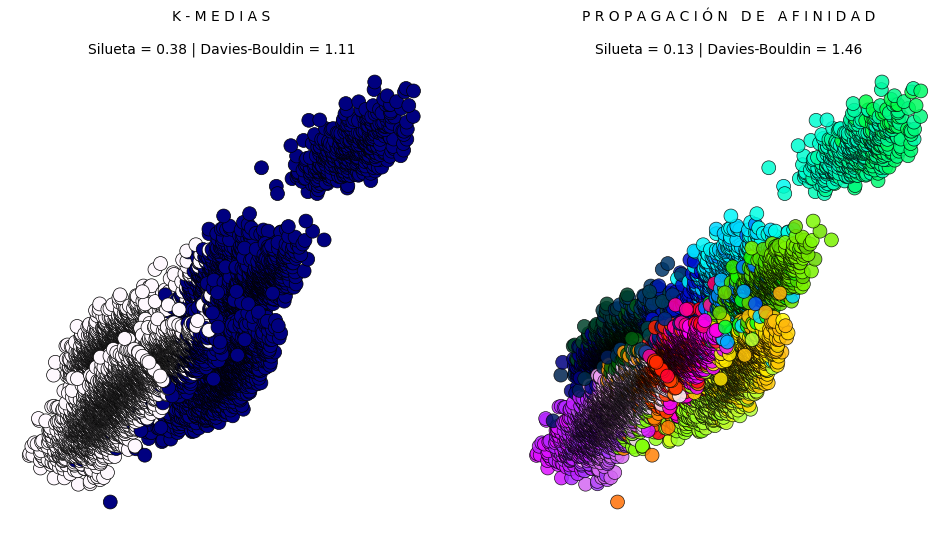

In [ ]:
from sklearn.cluster import KMeans, AffinityPropagation
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np
import matplotlib.pyplot as plt

# silhouette_score -> entre más alto mejor
# davies_bouldin_score -> entre más bajo mejor

# Clusters con el algoritmo K-Means (K-medias)
clusters_km = KMeans(n_clusters=2, random_state=0)
clusters_km.fit_predict(X_scaled)

# Cálculo de métricas para K-Means
silueta_km = silhouette_score(X_scaled, clusters_km.labels_)
davies_bouldin_km = davies_bouldin_score(X_scaled, clusters_km.labels_)

# labels_ devuelve un array unidimensional donde cada elemento corresponde a la etiqueta del cluster asignada a cada
# punto de datos en el conjunto de datos que se utilizó para ajustar el modelo

# Clusters con el algoritmo de Propagación de Afinidad
clusters_ap = AffinityPropagation(random_state=1)
clusters_ap.fit_predict(X_scaled)

# Cálculo de métricas para Propagación de Afinidad
silueta_ap = silhouette_score(X_scaled, clusters_ap.labels_)
davies_bouldin_ap = davies_bouldin_score(X_scaled, clusters_ap.labels_)

# Graficando los resultados
fig = plt.figure(figsize=(12, 6))
plt.set_cmap("gist_ncar")

# Gráfica de clusters con K-Means
ax = fig.add_subplot(1, 2, 1)
ax.scatter(X_scaled[clusters_km.labels_>=0][:, 0], X_scaled[clusters_km.labels_>=0][:, 1],
           c=clusters_km.labels_[clusters_km.labels_>=0], s=100,
           linewidth=0.5, edgecolors="black")
ax.set_title("K - M E D I A S\n\nSilueta = %.2f | Davies-Bouldin = %.2f" %
             (silueta_km, davies_bouldin_km), fontsize=10)
ax.axis("off")

# Gráfica de clusters con Propagación de Afinidad
ax = fig.add_subplot(1, 2, 2)
ax.scatter(X_scaled[clusters_ap.labels_>=0][:, 0], X_scaled[clusters_ap.labels_>=0][:, 1],
           c=clusters_ap.labels_[clusters_ap.labels_>=0], s=100,
           linewidth=0.5, edgecolors="black", alpha=0.85)
ax.set_title("P R O P A G A C I Ó N   D E   A F I N I D A D\n\nSilueta = %.2f | Davies-Bouldin = %.2f" %
             (silueta_ap, davies_bouldin_ap), fontsize=10)
ax.axis("off")

plt.show()

## Clusters con K-Means para diferentes valores de K

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

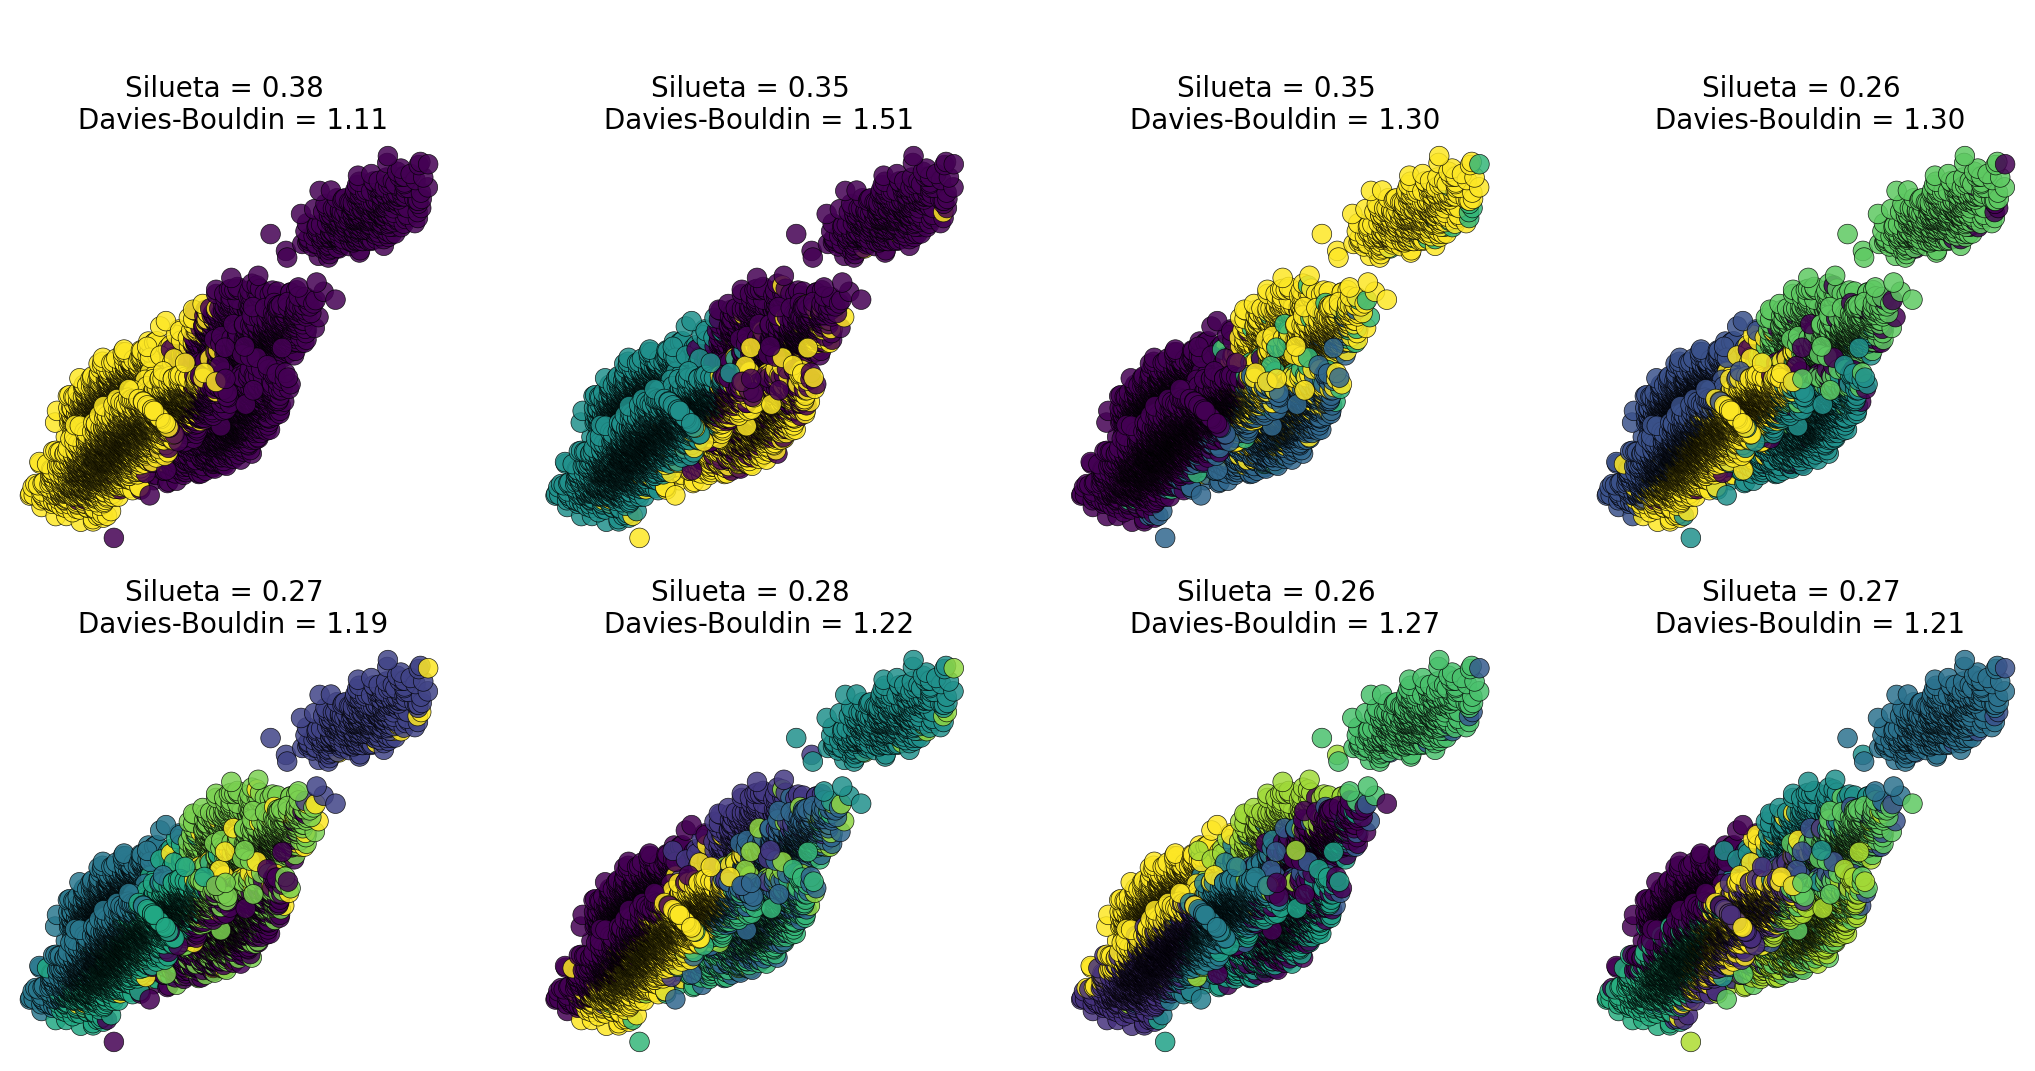

In [ ]:
fig = plt.figure(figsize=(26, 12))

for k in range(2, 10):
    # Creación de clusters
    clusters = KMeans(n_clusters=k, random_state=0)
    clusters.fit_predict(X_scaled)
    # Cálculo de métricas
    silueta = silhouette_score(X_scaled, clusters.labels_)
    davies_bouldin = davies_bouldin_score(X_scaled, clusters.labels_)
    # Graficando clusters
    ax = fig.add_subplot(2, 4, k-1)
    ax.scatter(X_scaled[clusters.labels_>=0][:, 0], X_scaled[clusters.labels_>=0][:, 1],
               c=clusters.labels_[clusters.labels_>=0], s=200,
               linewidth=0.5, edgecolors="black", alpha=0.85)
    ax.set_title("\n\nSilueta = %.2f \n Davies-Bouldin = %.2f" %
                 (silueta, davies_bouldin), fontsize=20)
    ax.axis("off")

plt.show()

Como podemos observar, los valores de silueta y Davies-Bouldin son mejores cuanto menos clusters tenemos, esto seguramente se debe a que en nuestro dataset tenemos 7 tipos distintos de fríjoles, de los cuales hay 6 muy parecidos entre si y uno que es bastante distinto a todos los demás, así que lo más posible es que esta sea la diferenciación que está realizando nuestro algoritmo

# Market Basket

In [ ]:
df=pd.read_csv('Groceries_dataset.csv')
df

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


## Exploración previa y limpieza de datos

In [ ]:
!pip install apyori  ## Installing apriori library

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=e5a09debe1234d774f3f06b8877429841568213c111637401a255d958bb305e1
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [ ]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [ ]:
df.isnull().sum().sort_values(ascending=False)

Member_number      0
Date               0
itemDescription    0
dtype: int64

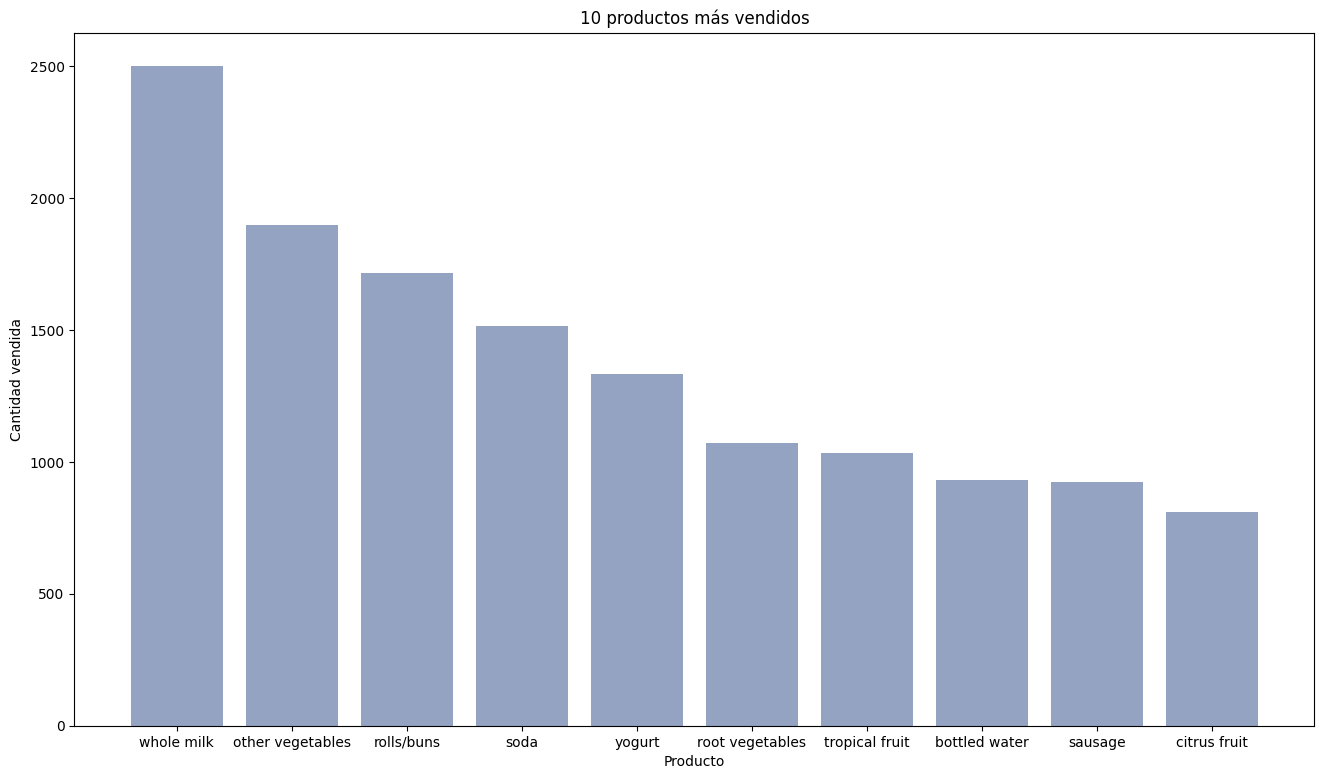

In [ ]:
## Creating distribution of Item Sold

Item_distr = df.groupby(by = "itemDescription").size().reset_index(name='Frequency').sort_values(by = 'Frequency',ascending=False).head(10)

## Declaring variables

bars = Item_distr["itemDescription"]
height = Item_distr["Frequency"]
x_pos = np.arange(len(bars))

## Defining Figure Size

plt.figure(figsize=(16,9))

# Create bars
plt.bar(x_pos, height, color=(0.3, 0.4, 0.6, 0.6))

# Add title and axis names
plt.title("10 productos más vendidos")
plt.xlabel("Producto")
plt.ylabel("Cantidad vendida")

# Create names on the x-axis
plt.xticks(x_pos, bars)

# Show graph
plt.show()

In [ ]:
## Convertimos la columna Date, de objeto a DateTime
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 908.7+ KB


<ipython-input-9-de9a9c10a62b>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
## Elegimos la columna Date como índice, para el siguiente gráfico
df_date=df.set_index(['Date'])
df_date

,Member_number,itemDescription
Date,,
2015-07-21,1808,tropical fruit
2015-05-01,2552,whole milk
2015-09-19,2300,pip fruit
2015-12-12,1187,other vegetables
2015-01-02,3037,whole milk
...,...,...
2014-08-10,4471,sliced cheese
2014-02-23,2022,candy
2014-04-16,1097,cake bar


[Text(0.5, 0, 'Fecha'), Text(0, 0.5, 'Cantidad')]

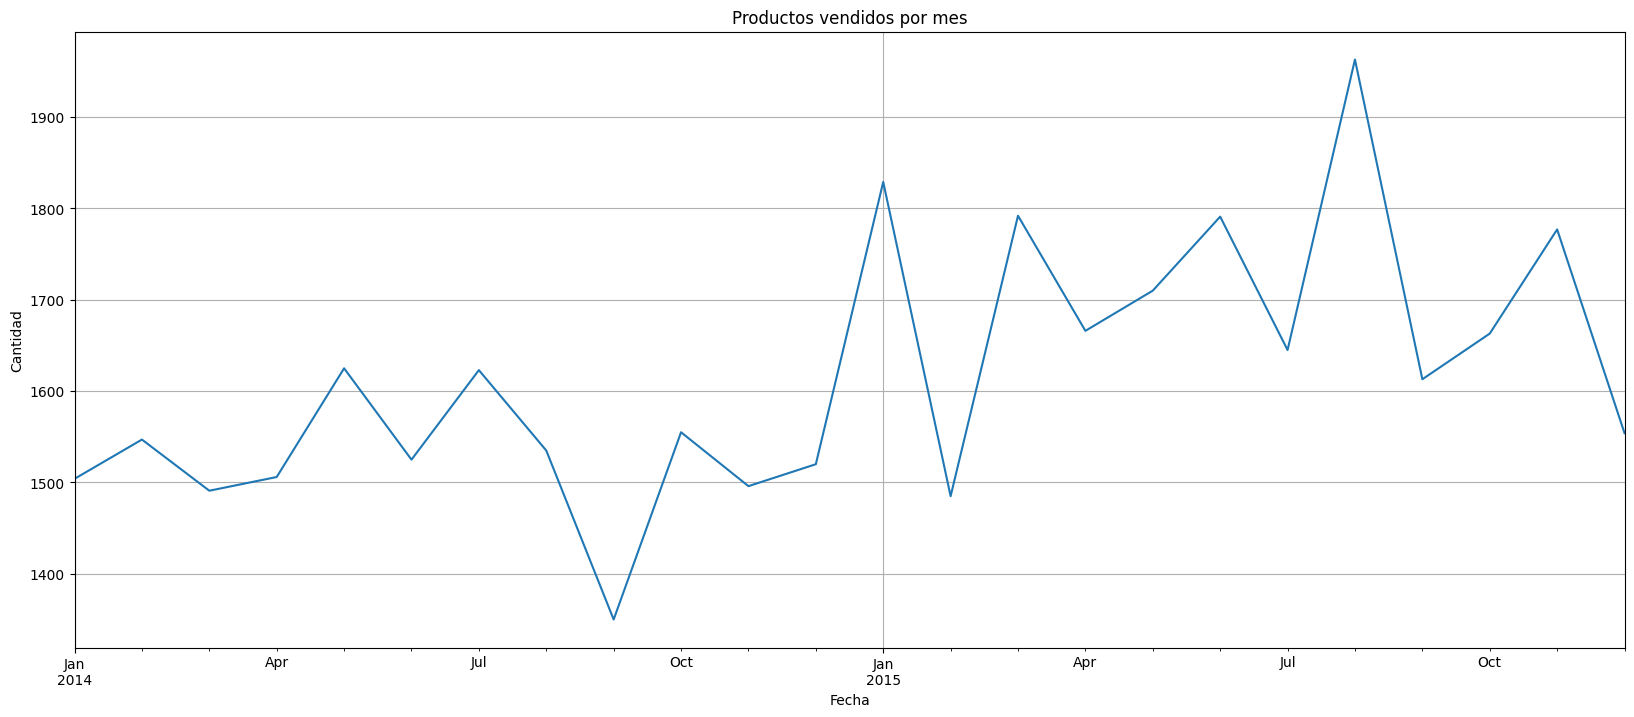

In [ ]:
df_date.resample("M")['itemDescription'].count().plot(figsize = (20,8), grid = True, title = "Productos vendidos por mes").set(xlabel = "Fecha", ylabel = "Cantidad")

In [ ]:
cust_level = df[["Member_number", "itemDescription"]].sort_values(by = "Member_number", ascending = False) ## Elegimos solo las variables necesarias para el modelo
cust_level['itemDescription'] = cust_level['itemDescription'].str.strip() # Eliminamos los espacios en blanco, si hay alguno
cust_level

,Member_number,itemDescription
3578,5000,soda
34885,5000,semi-finished bread
11728,5000,fruit/vegetable juice
9340,5000,bottled beer
19727,5000,root vegetables
...,...,...
13331,1000,whole milk
17778,1000,pickled vegetables
6388,1000,sausage
20992,1000,semi-finished bread


Creamos la lista de transacciones

In [ ]:
transactions = [a[1]['itemDescription'].tolist() for a in list(cust_level.groupby(['Member_number']))] ## Combinamos todos los productos en una lista, para cada cliente

<ipython-input-13-f3e6d8d2b5a6>:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  transactions = [a[1]['itemDescription'].tolist() for a in list(cust_level.groupby(['Member_number']))] ## Combing all the items in list format for each cutomer


Entrenamos el modelo

In [ ]:
from apyori import apriori ## Importamos el paquete apriori
rules = apriori(transactions = transactions, min_support = 0.002, min_confidence = 0.05, min_lift = 1.5, min_length = 2, max_length = 2)

In [ ]:
results = list(rules)

In [ ]:
def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))
resultsinDataFrame = pd.DataFrame(inspect(results), columns = ['Producto 1', 'Producto 2', 'Soporte', 'Confianza', 'Lift'])

Resultados

Como podemos observar, las variables en las que nos vamos a fijar, para predecir lo posible que es que un cliente compre cierto producto, son las siguientes:

Soporte: Esto indica qué tan popular es un conjunto de elementos, según la proporción de transacciones en las que aparece dicho conjunto.

Confianza: Esto indica qué tan probable es que el artículo Y sea comprado cuando se compra el artículo X, expresado como {X -> Y}. Se mide según la proporción de transacciones con el artículo X, en las cuales también aparece el artículo Y.

Lift: Esto indica qué tan probable es que el artículo Y sea comprado cuando se compra el artículo X, teniendo en cuenta cuán popular es el artículo Y.



En la siguiente tabla, podemos observar los 10 productos que se compran en conjunto de forma más típica

In [ ]:
resultsinDataFrame.nlargest(n=10, columns="Lift")

,Producto 1,Producto 2,Soporte,Confianza,Lift
13,kitchen towels,UHT-milk,0.002309,0.300000,3.821569
40,potato products,beef,0.002565,0.454545,3.802185
171,canned fruit,coffee,0.002309,0.428571,3.728954
339,flour,mayonnaise,0.002309,0.063380,3.338599
553,sparkling wine,waffles,0.002565,0.217391,3.150154
480,rice,napkins,0.003079,0.244898,3.011395
329,meat spreads,domestic eggs,0.003592,0.400000,3.004239
511,photo/film,white wine,0.002565,0.129870,2.943220
257,condensed milk,pot plants,0.002052,0.086022,2.890619
24,baking powder,frozen fish,0.002309,0.074380,2.870633


In [ ]:
resultsinDataFrame.nlargest(n=10, columns="Soporte")

,Producto 1,Producto 2,Soporte,Confianza,Lift
562,whipped/sour cream,white bread,0.021550,0.139303,1.569379
538,sausage,sugar,0.020523,0.099626,1.511065
156,canned beer,salty snack,0.017188,0.104037,1.501990
151,canned beer,ham,0.015906,0.096273,1.519325
48,berries,fruit/vegetable juice,0.015649,0.196141,1.569937
152,canned beer,ice cream,0.014366,0.086957,1.540711
328,domestic eggs,meat,0.013084,0.098266,1.544518
353,frankfurter,misc. beverages,0.013084,0.095149,1.612573
343,flour,tropical fruit,0.012827,0.352113,1.506625
484,newspapers,specialty bar,0.012314,0.088073,1.674683


En esta tabla, podemos observar los 10 productos más populares

## Conclusiones:

Agosto de 2015 fue el mes en el que se realizaron más compras en nuestro negocio.

Los productos más populares son: La nata montada o agria, salchichas, cerveza, huevos, harina, pariodicos y las frutas como el arándano, fresa o mora.

Los productos que más se compran de forma conjunta son: La leche con servilletas de cocina. Patatas con ternera. Fruta enlatada con café. Harina con mayonesa. Vino con gofres Y Arroz con servilletas  

Los resultados son algo pobres ya que nuestro dataset es relativamente pequeño,
en los problemas de market basket, es típico tener datasets con cientos de miles o incluso millones de transacciones, pero mi dataset solo cuenta con 38000, es por eso que tenemos niveles de Soporte, Confianza y Lift relativamente bajos.

# Detección de anomalías

In [ ]:
X_scaled.shape

(13611, 8)

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
# Bosques de Aislamiento con diferente contaminación
resultados = np.zeros((3, X_scaled.size//8))

c = [0.01, 0.05, 0.1]
for i in range(len(c)):
    modelo = IsolationForest(contamination=c[i]).fit(X_scaled)
    resultados[i] = modelo.predict(X_scaled)




In [ ]:
pd.DataFrame(X_scaled[resultados[i]==-1] , columns = df.columns)


,MajorAxisLength,MinorAxisLength,AspectRation,Extent,Solidity,roundness,ShapeFactor2,ShapeFactor4
0,-1.780023,-0.425037,-2.317649,0.697477,-0.462907,0.231054,3.100893,0.771138
1,-1.580811,-0.431260,-1.990888,0.671260,-2.241767,0.515049,2.515075,-0.197985
2,-1.753189,-0.214025,-2.539007,0.476020,0.804772,1.874992,3.270983,0.939640
3,-1.571285,-0.387934,-2.029908,0.258100,-0.656939,-0.339428,2.561150,0.912770
4,-1.523542,-0.412986,-1.922083,0.444716,0.277439,1.360234,2.409323,0.890839
...,...,...,...,...,...,...,...,...
1356,-0.454301,-1.052676,0.591223,-1.561234,-2.035515,-0.361604,-0.141158,-1.709619
1357,-0.514252,-0.891894,0.293832,0.707545,-2.481234,-1.893158,0.051278,0.037399
1358,-0.434211,-0.759359,0.255970,-1.555065,-2.507809,-1.325902,-0.007521,-1.426532
1359,-0.609387,-0.391807,-0.484921,-0.153432,-3.107132,-1.857156,0.508588,0.600140


Como podemos ver, nuestro algoritmo detecta 1361 registros identificados como anómalos, teniendo en cuenta que contamos con 13761 registros, esto supone que hasta un 10% podría ser anómalo.

En este caso seguramente se deba a que nuestro dataset viene de imágenes de fríjoles capturadas con cámara, así que achacaremos este porcentaje de error a fallos de la cámara, o del proceso de conversión de los datos en formato imágen, a datos en formato numérico.